In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from icecream import ic

In [3]:
from main import all_predictions
from Benchmarks import SAA

### Upload & Parse JD Dataset

In [4]:
jd_orders_path = 'data/raw/JD_order_data.csv'
df = pd.read_csv(jd_orders_path)

In [5]:
df.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16


In [7]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [8]:
orders = df.groupby(['sku_ID', 'order_date'])['quantity'].sum().unstack().fillna(0)
orders.head(100)

order_date,2018-03-01,2018-03-02,2018-03-03,2018-03-04,2018-03-05,2018-03-06,2018-03-07,2018-03-08,2018-03-09,2018-03-10,...,2018-03-22,2018-03-23,2018-03-24,2018-03-25,2018-03-26,2018-03-27,2018-03-28,2018-03-29,2018-03-30,2018-03-31
sku_ID,,,,,,,,,,,,,,,,,,,,,
000aa92b82,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
000d4af39d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000dc27e13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000e84e3a7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00104dbcd7,1.0,3.0,1.0,0.0,2.0,4.0,4.0,4.0,0.0,6.0,...,1.0,1.0,5.0,0.0,5.0,2.0,5.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02655d8b2d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
027604c03a,2.0,6.0,5.0,10.0,11.0,16.0,21.0,22.0,21.0,2.0,...,3.0,4.0,6.0,9.0,4.0,13.0,11.0,8.0,3.0,6.0
027761d794,9.0,8.0,11.0,5.0,2.0,2.0,3.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Sparsity

Idea: many SKUs are ordered only a handful of times throughout the month. Most days, that SKU has an order quantity of zero. We call these types of SKUs sparse. It is very difficult to predict the order quantity for sparse SKUs and we try to quantify the following:
1. How many SKUs are sparse in the JD dataset?
2. How difficult is it to predict the order quantity for sparse SKUs?
3. Are many of the costs we incurr due to mistakes made on sparse SKUs?

The average SKU has 79.3% of days with 0 orders placed (std = 25.8).


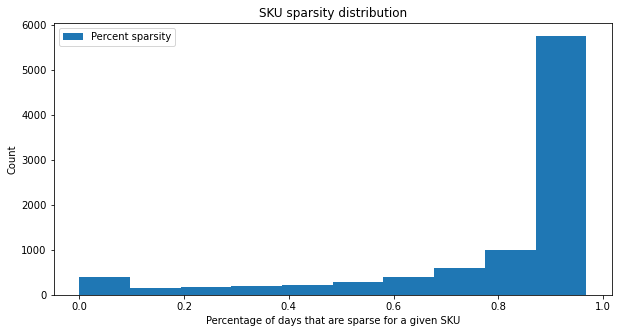

In [9]:
# For each SKU, compute the percent of orders that are 0 for each SKU
sparsity = (orders == 0).sum(axis=1) / orders.shape[1]
print('The average SKU has {:.3}% of days with 0 orders placed (std = {:.3}).'.format(sparsity.mean() * 100, sparsity.std() * 100))

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(sparsity, bins=10, label='Percent sparsity')
ax.set(xlabel='Percentage of days that are sparse for a given SKU', ylabel='Count', title='SKU sparsity distribution')
ax.legend()

plt.show()

Let's take a closer look at indivudal SKUs to get a sense of how sparse they are:

In [26]:
def plot_sku(ts, sku_id, sparse=None, varience=None):
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.bar(range(len(ts)), ts)
    sparse_msg = '({:.3}% Sparse)'.format(sparse * 100) if sparse is not None else ''
    varience_msg = '(Var = {:.3})'.format(varience) if varience is not None else ''
    ax.set(xlabel='Date', ylabel='Quantity', title='SKU {}'.format(sku_id) + sparse_msg + varience_msg)
    plt.show()

In [11]:
sku_ids = orders.index.to_list()
dates = orders.columns.to_list()

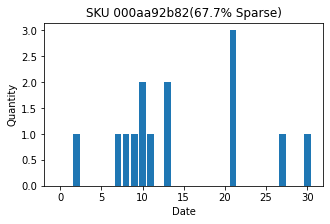

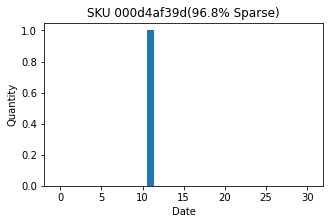

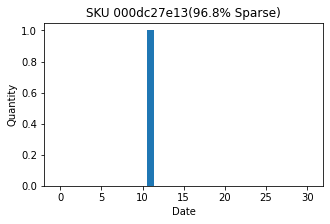

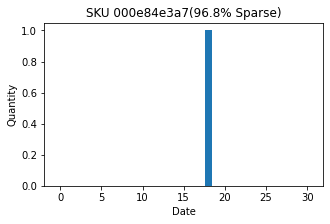

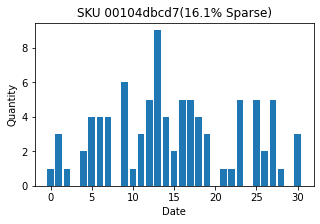

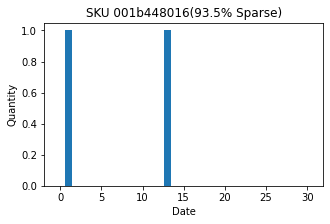

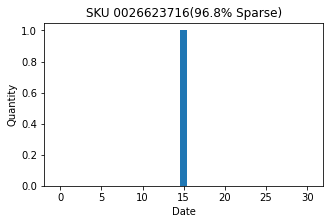

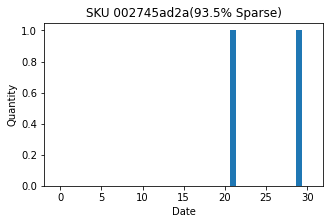

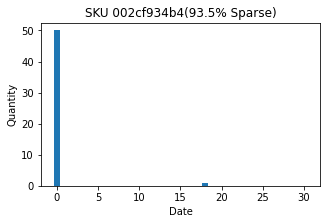

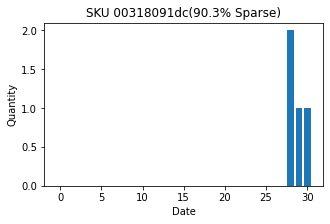

In [12]:
n_plots = 10
for i in range(n_plots):
    ts = orders.iloc[i].to_list()
    plot_sku(ts, sku_ids[i], sparsity[i])

In [13]:
def vectorized_SAA(orders, beta):
    n = orders.shape[1]
    df = orders.apply(lambda x: np.sort(x), axis=1, raw=True)
    idx = int(np.ceil(n * beta))-1
    y_pred = df.iloc[:, idx].to_numpy()
    return y_pred

In [14]:
def get_cost(y_pred, y_true, c_o, c_u):
    """ y_pred = predicted demand for each day; y_true = actual demand for each day """
    return c_u * np.squeeze((y_true-y_pred)*[y_true > y_pred]) + c_o * np.squeeze((y_pred-y_true) * [y_pred > y_true])

In [15]:
c_u, c_o = 2, 2
beta = c_u / (c_u + c_o)

predictions = np.zeros(orders.shape)
costs = np.zeros(orders.shape)

for day_idx in range(1, orders.shape[1]):

    y_pred = vectorized_SAA(orders.iloc[:, :day_idx], beta)
    y_true = orders.iloc[:, day_idx].to_numpy()
    cost = get_cost(y_pred, y_true, c_o, c_u)
    
    predictions[:, day_idx] = y_pred
    costs[:, day_idx] = cost


In [18]:
def get_avg_cost(orders, c_u, c_o):
    beta = c_u / (c_u + c_o)
    
    costs = []
    
    for day_idx in range(1, orders.shape[1]):

        y_pred = vectorized_SAA(orders.iloc[:, :day_idx], beta)
        y_true = orders.iloc[:, day_idx].to_numpy()
        cost = get_cost(y_pred, y_true, c_o, c_u)
        costs.append(cost)
        
    avg_cost = np.mean(costs, axis=0)
    return avg_cost

In [19]:
avg_cost = get_avg_cost(orders, c_u=1, c_o=1)
orders['avg_cost'] = avg_cost

In [20]:
np.min(avg_cost), np.max(avg_cost), np.mean(avg_cost), np.std(avg_cost)

(0.03333333333333333, 451.6, 1.565724060123012, 10.579186186381161)

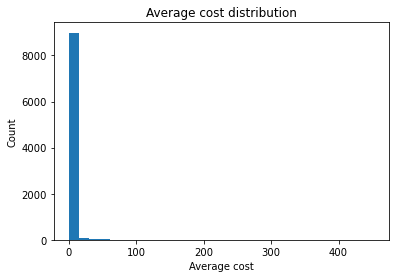

In [21]:
fig, ax = plt.subplots()
ax.hist(avg_cost, bins=30, label='Average cost')
ax.set(xlabel='Average cost', ylabel='Count', title='Average cost distribution')
plt.show()

This histogram is heavily skewed to the right. To get a better look, let's use a log scale.

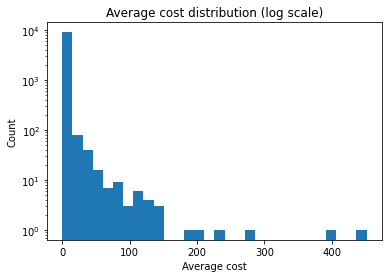

In [22]:
fig, ax = plt.subplots()
ax.hist(avg_cost, bins=30, label='Average cost')
ax.set(xlabel='Average cost', ylabel='Count', title='Average cost distribution (log scale)', yscale='log')
plt.show()

The huge spike on the left side of the graph is a very notable feature. This means that there are very many SKUs that have a low average cost. In other words, on a majority of products, SAA predicts the order quantity very well - hence the low cost. It seems that most SKUs have an average cost of 150 or lower. But there are certain outliers, certain SKUs that SAA does a terrible job of predicting. Let's plot all of the SKUs that have an average cost above 150 and take a look at what makes them so difficult for SAA to predict.

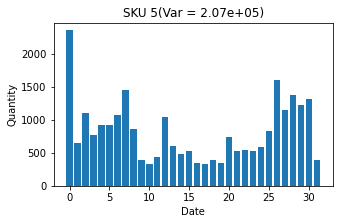

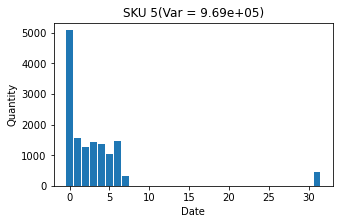

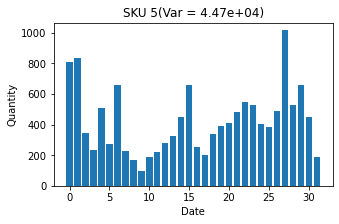

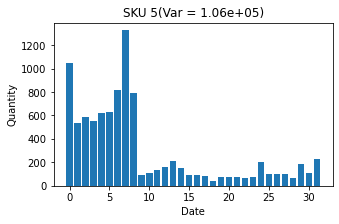

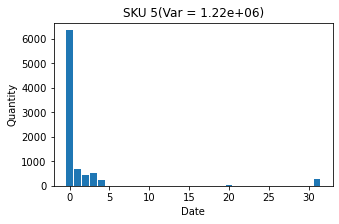

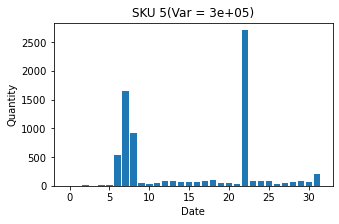

In [27]:
threshold = 150
orders_above_threshold = orders[orders['avg_cost'] > threshold]

for i in range(len(orders_above_threshold)):
    
    ts = orders_above_threshold.iloc[i].to_list()
    plot_sku(ts, '5', varience=np.var(ts))

Note: We should make a plot with the cost on each day and the predicted demand for each day against the actual demand.

So what about these SKUs make it particularly hard for SAA to make a prediction?

### High Varience
First, many of these SKUs have a high varience, meaning they are very volatile. Below we plot the distribution of varience for each SKU and highlight in red the varience of these difficult-to-predict SKUs. It is clear that the SKUs we perform worst on have some of the highest varience of all values. Interestingly enough, there are two SKUs that we perform poorly on that don't have such high variences. This seems to suggest that even SKUs with low varience, we can still have immense difficulty predicting. So we must consider other factors as well to explain why we perform so poorly on these SKUs.

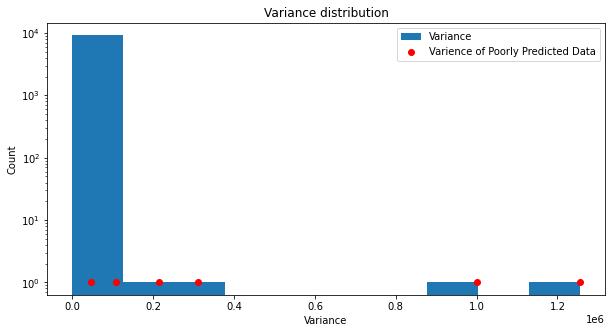

In [28]:
varience = orders.var(axis=1)
var_above_threshold = orders_above_threshold.var(axis=1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(varience, label='Variance')
ax.scatter(var_above_threshold, [1]*var_above_threshold.shape[0], label='Varience of Poorly Predicted Data', color='r')
ax.set(yscale='log', xlabel='Variance', ylabel='Count', title='Variance distribution')
ax.legend()
plt.show()

##### Maximum Order

Second, the maximum number of these SKUs ordered on a single day is huge: 1000 or higher for all of the poorly predicted SKUs. Below we plot the distribution of the maximum number ordered of each SKU. It is clear that our poorly performing SKUs are at the extremes of 



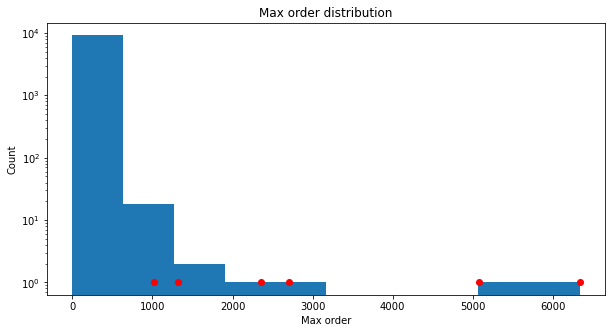

In [118]:
order_maxs = orders.max(axis=1)
order_max_above_threshold = orders_above_threshold.max(axis=1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(order_maxs, label='Max order')
ax.scatter(order_max_above_threshold, [1]*order_max_above_threshold.shape[0], label='Max order of Poorly Predicted Data', color='r')
ax.set(xlabel='Max order', ylabel='Count', title='Max order distribution', yscale='log')
plt.show()

Third, many of these SKUs have a spike close to the beginning of the month that completly throws us off and ruins our order of statistics approach. This makes it particularly difficult for SAA to be successful.

Consider having a very high order quantity dennoted by $h$ on the first day when the critical fractile is 0.9. Then according to SAA, we should order $h$ units for the following days even though the following days would likely have an order quantity much lower than $h$. The issue is not just that there is a spike, but rather that the spike is specifically at the beginning of the day.

How to detect a spike. 

What about sparsity and alpha-varience? Can I find a correlation between the max and cost, between the varience and cost?

Looking at the left spike of the histogram, it is clear that most products have a very small average cost. In other words, SAA has a very small error on most products. However, because *so* many products have this small cost, we have a large overall cost. In other words, there are few products that SAA, on average, makes really poor predictions on. We see this on the right side graph where there are very few products, meaning a very few number of SKUs have a very high average cost. What causes SAA to mess up on these products in particular? What is different about them? Let's sort the data by the average cost and look at the SKUs we mess up on the most.

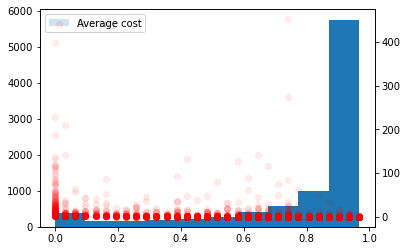

In [29]:
fig, ax_1 = plt.subplots()
ax_2 = ax_1.twinx()

ax_1.hist(sparsity, label='Sparsity')
ax_2.scatter(sparsity, avg_cost, alpha=0.07, c='r', label='Average cost')
ax_1.legend()
ax_2.legend()
plt.show()

In [81]:
def plot(orders, sparsity, c_u, c_o):
    avg_cost = get_avg_cost(orders, c_u=c_u, c_o=c_o)
    fig, ax = plt.subplots()
    ax.scatter(sparsity, avg_cost, alpha=0.07)
    ax.set(xlabel='Percentage of days that are sparse for a given SKU', ylabel='Average cost', title='SKU sparsity vs. average cost (c_u = {}, c_o = {})'.format(c_u, c_o))
    plt.show()

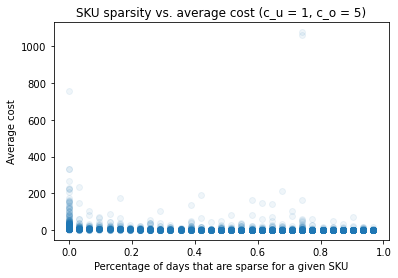

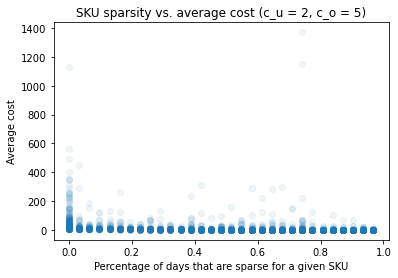

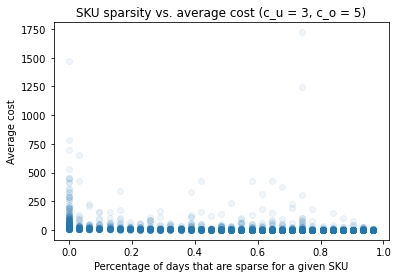

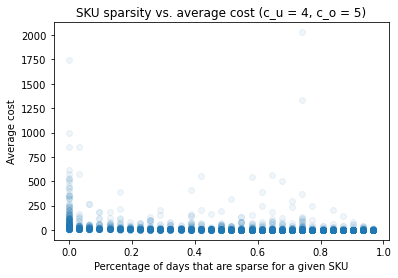

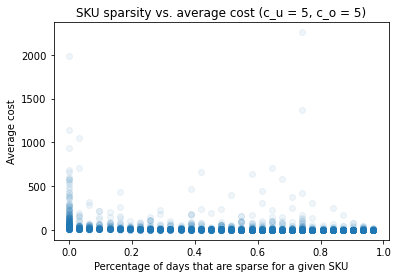

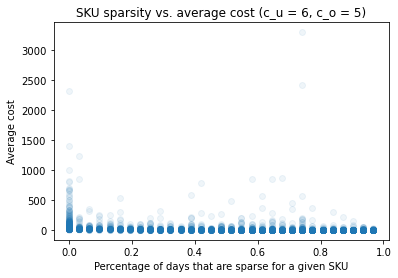

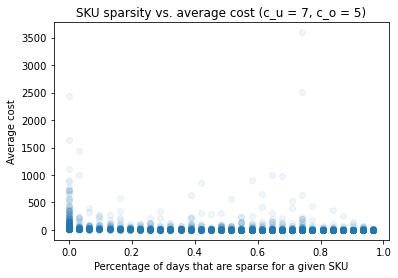

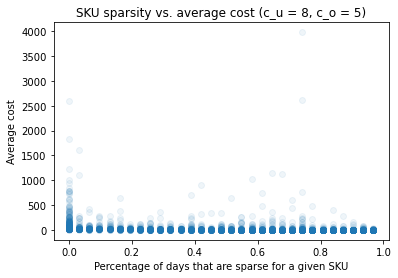

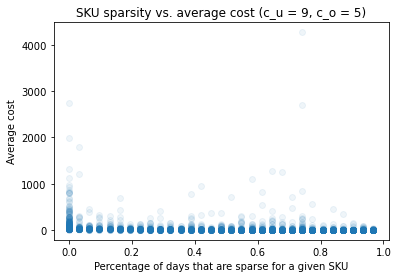

In [83]:
c_o = 5
for c_u in range(1, 10):
    plot(orders, sparsity, c_u, c_o)

In [13]:
methods = {'SAA': SAA}
window = 10
underage, overage = 1, 1
ts = orders.iloc[0].to_list()



predictions, costs = all_predictions(ts, methods, window, underage, overage, roll_window=False)

In [ ]:
pred

In [14]:
predictions

{'SAA': array([nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.])}

Clearly, tons of SKUs are sparse, meaning they have tons of days where zero orders of that SKU is made. However, we can generalize sparsity. It is difficult to predict the order quantity for sparse SKUs because on a few select days, the order quantity wildly differs than the average order quantity, here 0. So we can generalize sparsity to any SKU which has a few select days that wildly differs from the average ona few days.

This idea is suggestive of the varience, how far away all datapoints are from the average. But we want to explore how far away the most extreme datapoints are from the average. So we can say that a new way to quantify sparsity is to look at how much the top alpha% of datapoints deviate from the average. Formally,
    sparsity(alpha, d) = sum( sort(|d[i] - avg(d)|)[alpha * len(d):] )
